Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



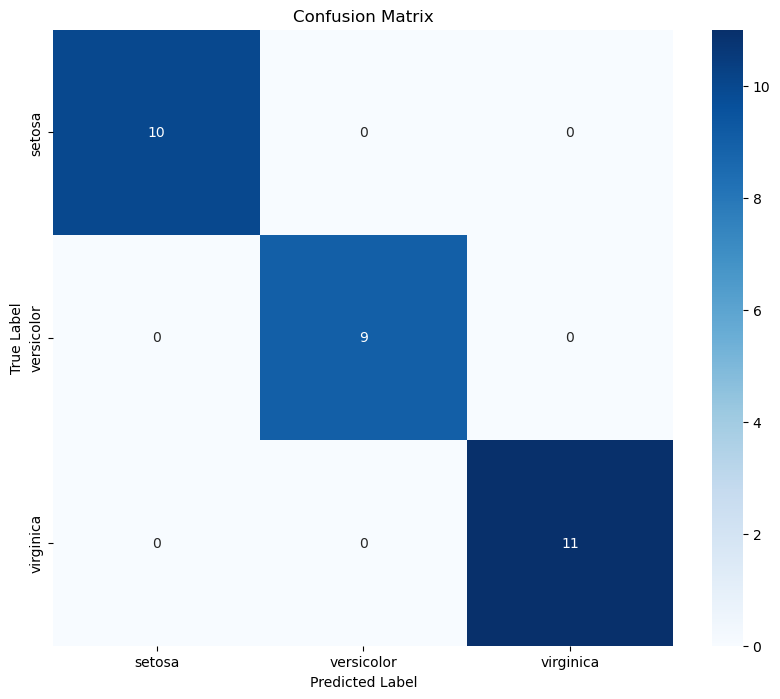

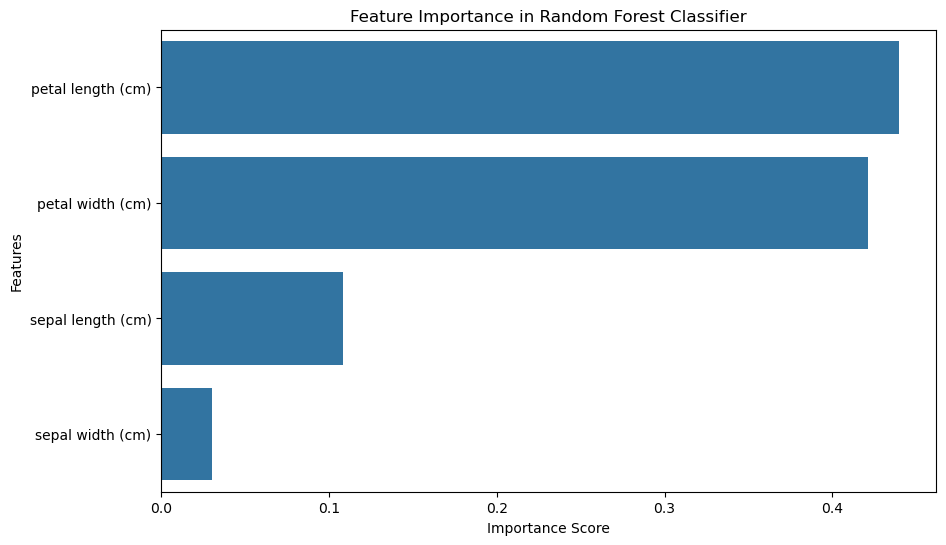


Model Accuracy: 1.000

Prediction for sample flower: setosa
Probabilities for each class: {np.str_('setosa'): np.float64(1.0), np.str_('versicolor'): np.float64(0.0), np.str_('virginica'): np.float64(0.0)}


/home/sain/miniforge3/envs/mlops/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print model performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Print model accuracy
print(f"\nModel Accuracy: {rf_classifier.score(X_test_scaled, y_test):.3f}")

# Example of making a prediction with new data
def predict_iris(model, scaler, features):
    """
    Make predictions for new iris flowers
    features should be in the order: sepal length, sepal width, petal length, petal width
    """
    features_scaled = scaler.transform([features])
    prediction = model.predict(features_scaled)
    probability = model.predict_proba(features_scaled)
    return iris.target_names[prediction[0]], probability[0]

# Example usage
sample_flower = [5.1, 3.5, 1.4, 0.2]
predicted_species, probabilities = predict_iris(rf_classifier, scaler, sample_flower)
print(f"\nPrediction for sample flower: {predicted_species}")
print("Probabilities for each class:", dict(zip(iris.target_names, probabilities)))